In [24]:
#importating Libraries

from sklearn.model_selection       import train_test_split
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.naive_bayes           import GaussianNB
from sklearn.linear_model          import LogisticRegression
from sklearn.metrics               import confusion_matrix,classification_report
from sklearn.metrics               import accuracy_score
from sklearn.tree                  import DecisionTreeClassifier,export_graphviz

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

In [25]:
#Reading data

lv_fertility_df = pd.read_csv("/Users/ujjwalrohit/Dataset for machine Learning/fertility.csv.xls")

In [26]:
#Displaying the characteristics of the fertility data set

print("The dimension of the data set is :",lv_fertility_df.shape)
print("The names of variables in the data set is:\n",lv_fertility_df.columns)
print("The information of the data set is :\n",lv_fertility_df.info())

The dimension of the data set is : (100, 10)
The names of variables in the data set is:
 Index(['Season', 'Age', 'Childish diseases', 'Accident or serious trauma',
       'Surgical intervention', 'High fevers in the last year',
       'Frequency of alcohol consumption', 'Smoking habit',
       'Number of hours spent sitting per day', 'Diagnosis'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-nul

In [27]:
print(lv_fertility_df['Season'].value_counts())
print("\n")
print(lv_fertility_df['Childish diseases'].value_counts())
print("\n")
print(lv_fertility_df['Accident or serious trauma'].value_counts())
print("\n")
print(lv_fertility_df['Surgical intervention'].value_counts())
print("\n")
print(lv_fertility_df['High fevers in the last year'].value_counts())
print("\n")
print(lv_fertility_df['Frequency of alcohol consumption'].value_counts())
print("\n")
print(lv_fertility_df['Smoking habit'].value_counts())
print("\n")
print(lv_fertility_df['Diagnosis'].value_counts())

spring    37
fall      31
winter    28
summer     4
Name: Season, dtype: int64


yes    87
no     13
Name: Childish diseases, dtype: int64


no     56
yes    44
Name: Accident or serious trauma, dtype: int64


yes    51
no     49
Name: Surgical intervention, dtype: int64


more than 3 months ago    63
no                        28
less than 3 months ago     9
Name: High fevers in the last year, dtype: int64


hardly ever or never    40
once a week             39
several times a week    19
several times a day      1
every day                1
Name: Frequency of alcohol consumption, dtype: int64


never         56
occasional    23
daily         21
Name: Smoking habit, dtype: int64


Normal     88
Altered    12
Name: Diagnosis, dtype: int64


In [28]:
for i in lv_fertility_df.columns:
        print(lv_fertility_df[str(i)].value_counts())
    

spring    37
fall      31
winter    28
summer     4
Name: Season, dtype: int64
28    28
30    27
32    17
33     7
27     7
29     5
35     4
36     2
31     2
34     1
Name: Age, dtype: int64
yes    87
no     13
Name: Childish diseases, dtype: int64
no     56
yes    44
Name: Accident or serious trauma, dtype: int64
yes    51
no     49
Name: Surgical intervention, dtype: int64
more than 3 months ago    63
no                        28
less than 3 months ago     9
Name: High fevers in the last year, dtype: int64
hardly ever or never    40
once a week             39
several times a week    19
several times a day      1
every day                1
Name: Frequency of alcohol consumption, dtype: int64
never         56
occasional    23
daily         21
Name: Smoking habit, dtype: int64
5      17
9      16
7      13
6      11
11     10
8      10
3      10
16      3
14      3
10      2
1       2
342     1
18      1
2       1
Name: Number of hours spent sitting per day, dtype: int64
Normal     88

In [29]:


        
lv_clean = {'Season' : {'spring':0,'fall':1,'winter':2,'summer':3},
            'Childish diseases':{'yes':0,'no':1},
            'Accident or serious trauma':{'yes':0,'no':1},
            'Surgical intervention':{'yes':0,'no':1},
           'High fevers in the last year':{'more than 3 months ago':0,
                                           'no':1,'less than 3 months ago':2},
           'Frequency of alcohol consumption':{'hardly ever or never':1,
                                               'once a week':2,
                                               'several times a week':3,
                                               'every day':4},
           'Smoking habit':{'never':0,'occasional':1,'daily':2},
           'Diagnosis':{'Normal':0,'Altered':1}}

lv_fertility_df = lv_fertility_df.drop('Frequency of alcohol consumption',axis = 1)

#Replace the Categories variable into int
lv_fertility_df = lv_fertility_df.replace(lv_clean)


In [30]:
print(lv_fertility_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Season                                 100 non-null    int64
 1   Age                                    100 non-null    int64
 2   Childish diseases                      100 non-null    int64
 3   Accident or serious trauma             100 non-null    int64
 4   Surgical intervention                  100 non-null    int64
 5   High fevers in the last year           100 non-null    int64
 6   Smoking habit                          100 non-null    int64
 7   Number of hours spent sitting per day  100 non-null    int64
 8   Diagnosis                              100 non-null    int64
dtypes: int64(9)
memory usage: 7.2 KB
None


In [31]:
#Using a random seed function for generating the same data set

np.random.seed(3000)

lv_training,lv_test = train_test_split(lv_fertility_df,test_size = 0.3)
lv_x_train = lv_training.drop(['Diagnosis'],axis = 1)
lv_y_train = lv_training['Diagnosis']

lv_x_test = lv_test.drop(['Diagnosis'],axis = 1)
lv_y_test = lv_test['Diagnosis']

In [32]:
#Creating a decision tree model

print("----------------DECISION TREE MODEL----------------")

lv_tree_fertility = DecisionTreeClassifier(max_depth = 3,random_state=0)
lv_tree_fertility.fit(lv_x_train,lv_y_train)

lv_tree_score_train = lv_tree_fertility.score(lv_x_train,lv_y_train)
lv_tree_score_test  = lv_tree_fertility.score(lv_x_test,lv_y_test)

print("Accuracy on training set of fertility data set is :",lv_tree_score_train)
print("Accuracy on test set of fertility data set is :",lv_tree_score_test)

----------------DECISION TREE MODEL----------------
Accuracy on training set of fertility data set is : 0.9
Accuracy on test set of fertility data set is : 0.8333333333333334


In [38]:
#Determining the importance of each predictor variable

print("The importance of the features of tree model:\n",lv_tree_fertility.feature_importances_)

The importance of the features of tree model:
 [0.35067846 0.         0.         0.25555924 0.         0.
 0.         0.3937623 ]


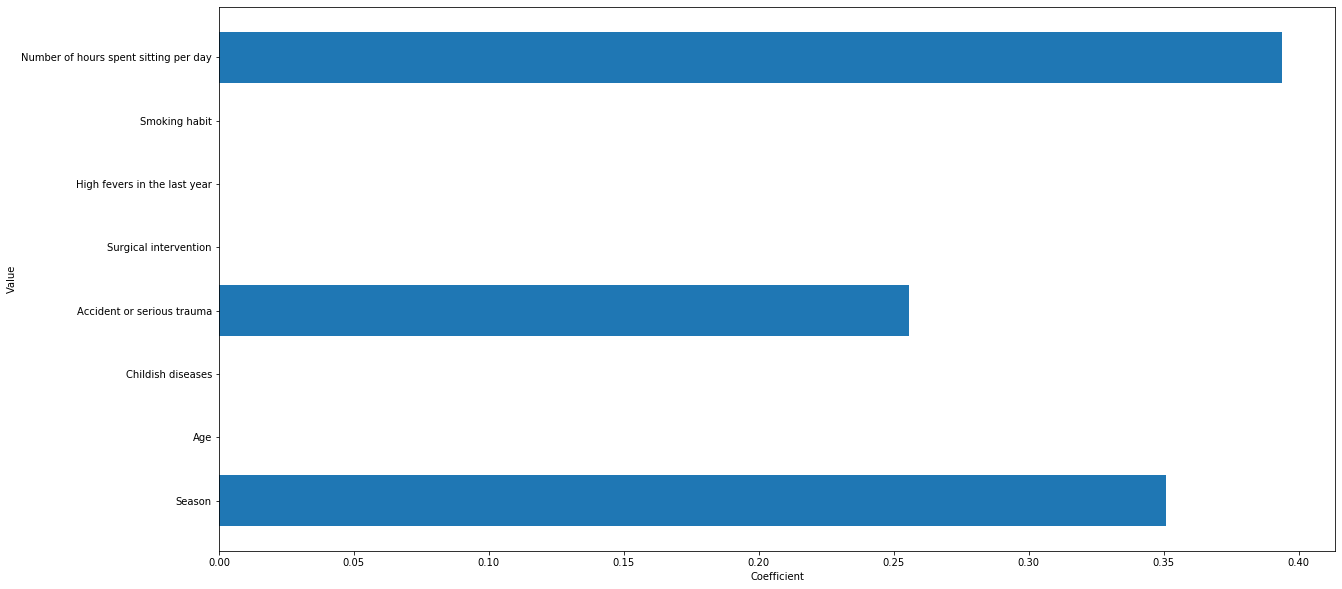

In [36]:
#Displaying importance of each variable in decision tree

plt.figure(1,figsize = (20,10))
plt.yticks(range(0,8),lv_x_train.columns)
plt.barh(range(0,8),lv_tree_fertility.feature_importances_,align = 'center')
plt.xlabel("Coefficient")
plt.ylabel("Value")
plt.show()

In [40]:
#Creating Confusion matrix and determining accuracy of the new model

lv_tree_acc_score = accuracy_score(lv_y_test,lv_tree_fertility.predict(lv_x_test))
lv_tree_result = confusion_matrix(lv_y_test,lv_tree_fertility.predict(lv_x_test))

print("The accuracy of Decision Tree model is :",lv_tree_acc_score)
print("The confusion matrix is :\n",lv_tree_result)

The accuracy of Decision Tree model is : 0.8333333333333334
The confusion matrix is :
 [[25  2]
 [ 3  0]]


In [41]:
# Creating a Logistic Regression model

print("-------------------LOGISTIC REGRESSION MODEL--------------")

lv_log_fertility = LogisticRegression()
lv_log_fertility.fit(lv_x_train,lv_y_train)
lv_log_acc_score = accuracy_score(lv_y_test,lv_log_fertility.predict(lv_x_test))
lv_log_result = confusion_matrix(lv_y_test,lv_log_fertility.predict(lv_x_test))

print("The accuracy of Logistic Regression is:",lv_log_acc_score)
print("The Confusion matrix is:\n",lv_log_result)

-------------------LOGISTIC REGRESSION MODEL--------------
The accuracy of Logistic Regression is: 0.8666666666666667
The Confusion matrix is:
 [[26  1]
 [ 3  0]]


In [42]:
#Creating a Naive Bayes model

print("------------------------NAIVE BAYES MODEL------------------")

lv_naive_fertility = GaussianNB()
lv_naive_fertility.fit(lv_x_train,lv_y_train)
lv_naive_acc_score = accuracy_score(lv_y_test,lv_naive_fertility.predict(lv_x_test))
lv_naive_result = confusion_matrix(lv_y_test,lv_naive_fertility.predict(lv_x_test))

print("The Accuracy of Naive bayes model is :",lv_naive_acc_score)
print("The Confusion matrix is:\n",lv_naive_result)

------------------------NAIVE BAYES MODEL------------------
The Accuracy of Naive bayes model is : 0.8666666666666667
The Confusion matrix is:
 [[26  1]
 [ 3  0]]


In [43]:
#Creating a K-NN model

print("--------------------KNN MODEL--------------------------")

lv_knn_fertility_list = []
for k in range(21):
    k = k + 1
    lv_knn_fertility = KNeighborsClassifier()
    lv_knn_fertility.fit(lv_x_train,lv_y_train)
    lv_knn_acc_score = accuracy_score(lv_y_test,lv_knn_fertility.predict(lv_x_test))
    lv_knn_result = confusion_matrix(lv_y_test,lv_knn_fertility.predict(lv_x_test))
    lv_knn_fertility_list.append(lv_knn_acc_score)
    print("The Accuracy Score of KNN model is :",lv_knn_acc_score)
    print("The Confusion matrix is :\n",lv_knn_result)

--------------------KNN MODEL--------------------------
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  0]
 [ 3  0]]
The Accuracy Score of KNN model is : 0.9
The Confusion matrix is :
 [[27  

The Maximum Accuracy using KNN is : 0.9


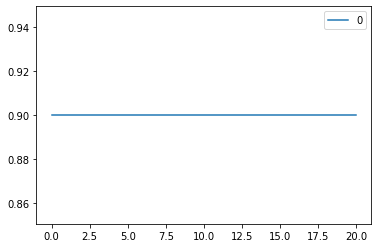

In [44]:
print("The Maximum Accuracy using KNN is :",max(lv_knn_fertility_list))

lv_score = pd.DataFrame(lv_knn_fertility_list)
lv_score.plot()